# Plots
This notebook creates plots for the Kaggle results (from the `kaggle_results` subdirectory).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
def plot_focus_resnet(frame, x_label, title):
    """
    Create a plot of the given frame with focus on the 6 ResNet lines.
    :param frame: a pandas dataframe with 11 columns (one for each model)
    :param x_label: the label for the x-axis
    :param title: the title of the plot
    """
    _, ax = plt.subplots(figsize=(15, 5))
    # focus on ResNet50, ResNet101, ResNet152 (bold) and ResNet50V2, ResNet101V2, ResNet152V2 (dotted
    ax.plot(frame['index'], frame[0], color='red', linewidth=5)
    ax.plot(frame['index'], frame[1], color='red', linewidth=5, linestyle='dotted')
    ax.plot(frame['index'], frame[2], color='green', linewidth=5)
    ax.plot(frame['index'], frame[3], color='green', linewidth=5, linestyle='dotted')
    ax.plot(frame['index'], frame[4], color='blue', linewidth=5)
    ax.plot(frame['index'], frame[5], color='blue', linewidth=5, linestyle='dotted')
    # the other lines are just gray with different marker symbols to distinguish them
    ax.plot(frame['index'], frame[6], color='gray', marker='4')
    ax.plot(frame['index'], frame[7], color='gray', marker='x')
    ax.plot(frame['index'], frame[8], color='gray', marker='p')
    ax.plot(frame['index'], frame[9], color='gray', marker='d')
    ax.plot(frame['index'], frame[10], color='gray', marker='s')
    # xticks, labels, title, legend
    ax.set_xticks(frame['index'])
    ax.set_xlabel(x_label)
    ax.set_ylabel('Public Kaggle score')
    ax.set_title(title)
    ax.legend(models)

In [15]:
def plot_focus_vgg(frame, x_label, title, color_xception=False):
    """
    Create a plot of the given frame with focus on the 2 VGG lines (and potentially the Xception line).
    :param frame: a pandas dataframe with 11 columns (one for each model)
    :param x_label: the label for the x-axis
    :param title: the title of the plot
    :param color_xception: if true, the Xception line will be bold and colored green
    """
    _, ax = plt.subplots(figsize=(15, 5))
    # now all ResNet lines are gray with different marker symbols, (same holds for InceptionV3, InceptionResNetV2)
    ax.plot(frame['index'], frame[0], color='gray', marker='v')
    ax.plot(frame['index'], frame[1], color='gray', marker='<')
    ax.plot(frame['index'], frame[2], color='gray', marker='>')
    ax.plot(frame['index'], frame[3], color='gray', marker='1')
    ax.plot(frame['index'], frame[4], color='gray', marker='2')
    ax.plot(frame['index'], frame[5], color='gray', marker='*')
    ax.plot(frame['index'], frame[6], color='gray', marker='4')
    ax.plot(frame['index'], frame[7], color='gray', marker='x')
    # VGG16 and VGG19 both bold and colored
    ax.plot(frame['index'], frame[8], color='tab:orange', linewidth=5)
    ax.plot(frame['index'], frame[9], color='tab:purple', linewidth=5)
    # Xception can be gray or bold green
    if color_xception:
        ax.plot(frame['index'], frame[10], color='tab:green', linewidth=5)
    else:
        ax.plot(frame['index'], frame[10], color='gray', marker='s')
    ax.set_xticks(frame['index'])
    ax.set_xlabel(x_label)
    ax.set_ylabel('Public Kaggle score')
    ax.set_title(title)
    ax.legend(models)

## Pairwise recency
First create the plots for pairwise recency. This includes a plot for both extended and not extended embeddings.

In [2]:
pairwise_frame = pd.read_csv('kaggle_results/recommendations_pairwise_recency_kaggle.csv')
pairwise_frame = pairwise_frame[pairwise_frame["visibility"] == "public"].copy()  # only look at public scores
pairwise_frame

,model,extended,visibility,sim_level_1,sim_level_2,sim_level_3,sim_level_4,sim_level_5,sim_level_6,sim_level_7,sim_level_8,sim_level_9,sim_level_10
0,ResNet50,False,public,0.00165,0.00130,0.00100,0.00109,0.00110,0.00115,0.00102,0.00093,0.00106,0.00092
1,ResNet50V2,False,public,0.00142,0.00103,0.00110,0.00099,0.00103,0.00108,0.00089,0.00099,0.00094,0.00094
2,ResNet101,False,public,0.00205,0.00140,0.00125,0.00141,0.00115,0.00103,0.00102,0.00123,0.00102,0.00129
3,ResNet101V2,False,public,0.00130,0.00103,0.00105,0.00099,0.00090,0.00101,0.00091,0.00102,0.00092,0.00088
4,ResNet152,False,public,0.00192,0.00150,0.00145,0.00149,0.00119,0.00106,0.00140,0.00120,0.00111,0.00118
5,ResNet152V2,False,public,0.00115,0.00111,0.00100,0.00108,0.00096,0.00088,0.00096,0.00093,0.00089,0.00097
6,InceptionV3,False,public,0.00184,0.00144,0.00129,0.00101,0.00119,0.00109,0.00100,0.00119,0.00094,0.00097
7,InceptionResNetV2,False,public,0.00196,0.00136,0.00115,0.00099,0.00103,0.00094,0.00101,0.00098,0.00092,0.00101
8,VGG16,False,public,0.00215,0.00138,0.00147,0.00137,0.00148,0.00126,0.00110,0.00128,0.00094,0.00099
9,VGG19,False,public,0.00175,0.00172,0.00126,0.00112,0.00103,0.00135,0.00129,0.00109,0.00097,0.00115


In [25]:
# model names
models = pairwise_frame["model"].values.tolist()

# extract 2 subframes
pairwise_frame_not_extended = pairwise_frame[pairwise_frame["extended"] == False].copy()
pairwise_frame_not_extended.drop(columns=['extended', 'visibility', 'model'], inplace=True)
pairwise_frame_not_extended = pairwise_frame_not_extended.T
pairwise_frame_not_extended.index = list(range(1, 11))
pairwise_frame_not_extended = pairwise_frame_not_extended.reset_index()

pairwise_frame_extended = pairwise_frame[pairwise_frame["extended"] == True].copy()
pairwise_frame_extended.drop(columns=['extended', 'visibility', 'model'], inplace=True)
pairwise_frame_extended = pairwise_frame_extended.T
pairwise_frame_extended.index = list(range(1, 11))
pairwise_frame_extended = pairwise_frame_extended.reset_index()
pairwise_frame_extended.columns = ['index'] + list(range(11))

In [10]:
pairwise_frame_not_extended

,index,0,1,2,3,4,5,6,7,8,9,10
0,1,0.00165,0.00142,0.00205,0.00130,0.00192,0.00115,0.00184,0.00196,0.00215,0.00175,0.00171
1,2,0.00130,0.00103,0.00140,0.00103,0.00150,0.00111,0.00144,0.00136,0.00138,0.00172,0.00147
2,3,0.00100,0.00110,0.00125,0.00105,0.00145,0.00100,0.00129,0.00115,0.00147,0.00126,0.00114
3,4,0.00109,0.00099,0.00141,0.00099,0.00149,0.00108,0.00101,0.00099,0.00137,0.00112,0.00109
4,5,0.00110,0.00103,0.00115,0.00090,0.00119,0.00096,0.00119,0.00103,0.00148,0.00103,0.00117
5,6,0.00115,0.00108,0.00103,0.00101,0.00106,0.00088,0.00109,0.00094,0.00126,0.00135,0.00106
6,7,0.00102,0.00089,0.00102,0.00091,0.00140,0.00096,0.00100,0.00101,0.00110,0.00129,0.00112
7,8,0.00093,0.00099,0.00123,0.00102,0.00120,0.00093,0.00119,0.00098,0.00128,0.00109,0.00102
8,9,0.00106,0.00094,0.00102,0.00092,0.00111,0.00089,0.00094,0.00092,0.00094,0.00097,0.00092
9,10,0.00092,0.00094,0.00129,0.00088,0.00118,0.00097,0.00097,0.00101,0.00099,0.00115,0.00090


In [26]:
pairwise_frame_extended

,index,0,1,2,3,4,5,6,7,8,9,10
0,1,0.00173,0.00122,0.00197,0.00125,0.00195,0.00118,0.00175,0.00205,0.00198,0.00157,0.00234
1,2,0.00127,0.00097,0.00148,0.00105,0.00158,0.00114,0.00169,0.00141,0.00143,0.00176,0.00172
2,3,0.00103,0.00110,0.00138,0.00105,0.00132,0.00099,0.00114,0.00109,0.00144,0.00119,0.00153
3,4,0.00112,0.00099,0.00138,0.00100,0.00146,0.00108,0.00123,0.00116,0.00137,0.00115,0.00144
4,5,0.00119,0.00105,0.00117,0.00089,0.00129,0.00096,0.00125,0.00110,0.00151,0.00106,0.00139
5,6,0.00111,0.00108,0.00110,0.00100,0.00119,0.00087,0.00109,0.00110,0.00125,0.00139,0.00117
6,7,0.00090,0.00089,0.00118,0.00097,0.00120,0.00097,0.00105,0.00112,0.00103,0.00126,0.00138
7,8,0.00110,0.00101,0.00109,0.00097,0.00127,0.00092,0.00099,0.00101,0.00134,0.00109,0.00115
8,9,0.00102,0.00093,0.00105,0.00092,0.00140,0.00089,0.00108,0.00098,0.00102,0.00097,0.00134
9,10,0.00100,0.00096,0.00133,0.00088,0.00097,0.00097,0.00119,0.00111,0.00101,0.00120,0.00101


### Plot not-extended
Create two plots: one that focusses on the ResNetxxx vs ResNetxxxV2 and another one that focusses on VGG16 and VGG19

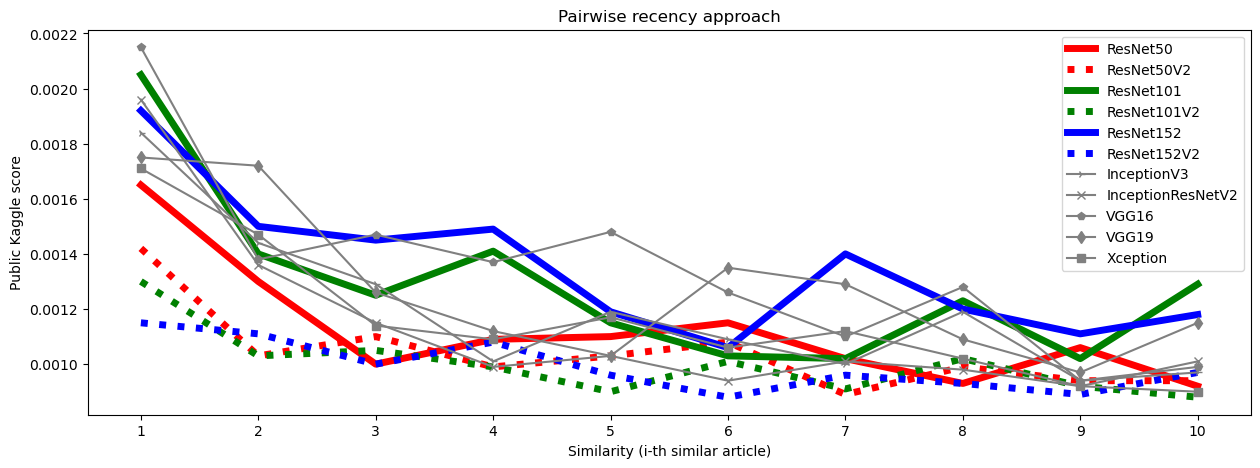

In [16]:
plot_focus_resnet(frame=pairwise_frame_not_extended, x_label='Similarity (i-th similar article)', title='Pairwise recency approach')

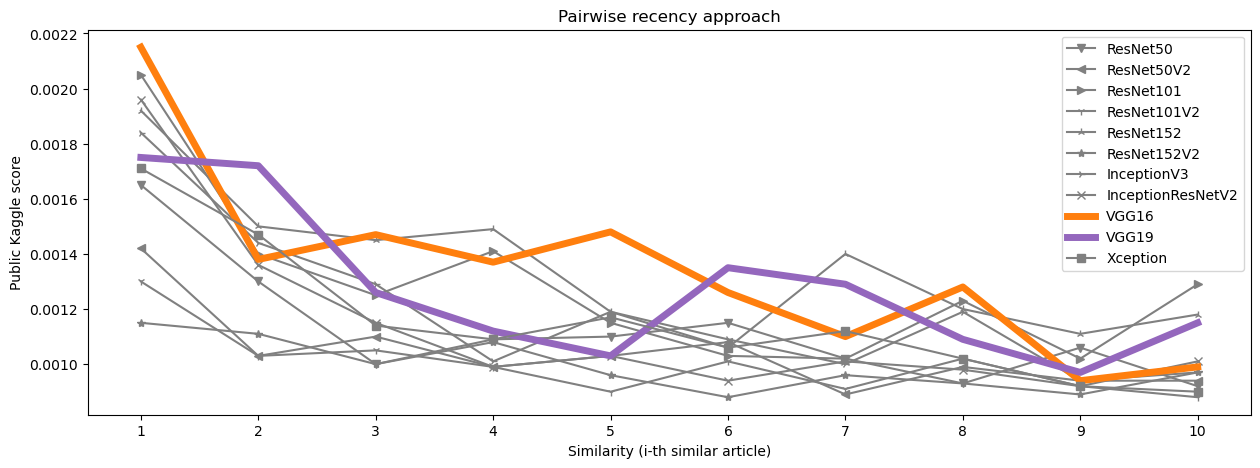

In [17]:
plot_focus_vgg(frame=pairwise_frame_not_extended, x_label='Similarity (i-th similar article)', title='Pairwise recency approach')

### Plot extended
Create again two plots: one that focusses on the ResNetxxx vs ResNetxxxV2 and another one that focusses on VGG16 and VGG19.

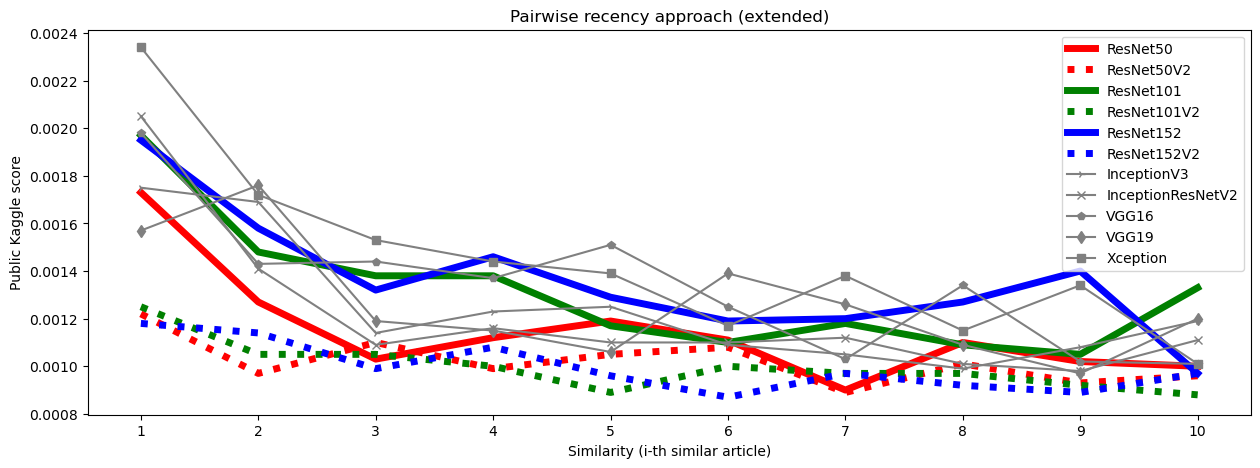

In [27]:
plot_focus_resnet(frame=pairwise_frame_extended, x_label='Similarity (i-th similar article)', title='Pairwise recency approach (extended)')

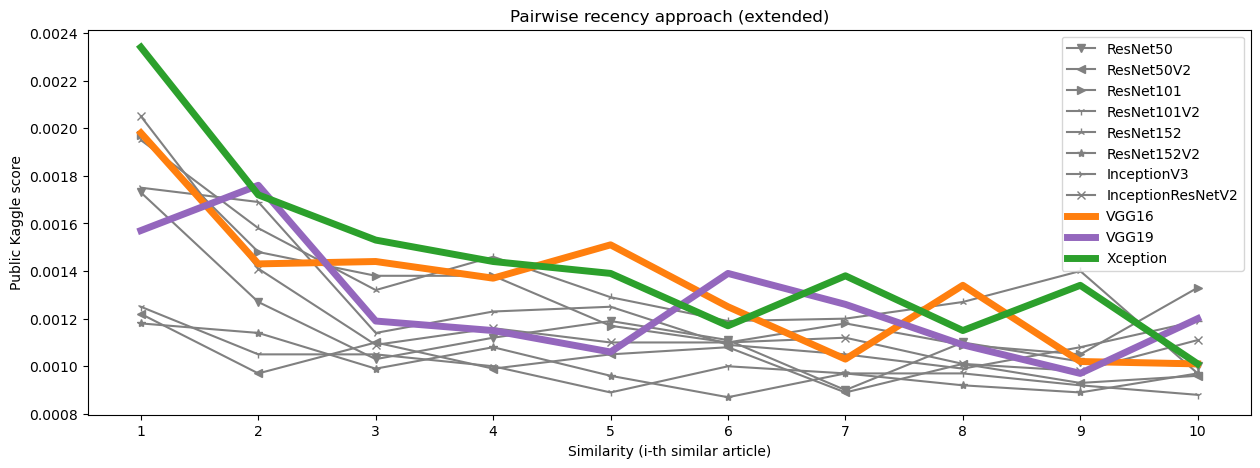

In [29]:
plot_focus_vgg(frame=pairwise_frame_extended, x_label='Similarity (i-th similar article)', title='Pairwise recency approach (extended)', color_xception=True)

## Mixed recency
Do something similar for mixed recency.

In [30]:
mixed_frame = pd.read_csv('kaggle_results/recommendations_mixed_recency_kaggle.csv')
mixed_frame = mixed_frame[mixed_frame["visibility"] == "public"].copy()  # only look at public scores
mixed_frame

,model,extended,visibility,num_recent_0,num_recent_1,num_recent_2,num_recent_3,num_recent_4,num_recent_5,num_recent_6,num_recent_7,num_recent_8,num_recent_9,num_recent_10,num_recent_11,num_recent_12
0,ResNet50,False,public,0.0056,0.00437,0.00364,0.00314,0.00290,0.00266,0.00252,0.00235,0.00221,0.00203,0.00189,0.00182,0.00171
1,ResNet50V2,False,public,0.0056,0.00417,0.00346,0.00297,0.00212,0.00247,0.00231,0.00213,0.00201,0.00182,0.00168,0.00161,0.00150
2,ResNet101,False,public,0.0056,0.00451,0.00390,0.00347,0.00327,0.00303,0.00291,0.00275,0.00263,0.00245,0.00232,0.00225,0.00216
3,ResNet101V2,False,public,0.0056,0.00411,0.00331,0.00286,0.00259,0.00234,0.00219,0.00201,0.00189,0.00171,0.00157,0.00150,0.00139
4,ResNet152,False,public,0.0056,0.00453,0.00387,0.00337,0.00312,0.00288,0.00277,0.00261,0.00249,0.00231,0.00217,0.00211,0.00201
5,ResNet152V2,False,public,0.0056,0.00398,0.00323,0.00271,0.00244,0.00218,0.00203,0.00187,0.00173,0.00156,0.00142,0.00136,0.00125
6,InceptionV3,False,public,0.0056,0.00443,0.00379,0.00336,0.00311,0.00284,0.00271,0.00254,0.00241,0.00224,0.00211,0.00205,0.00194
7,InceptionResNetV2,False,public,0.0056,0.00462,0.00404,0.00347,0.00323,0.00298,0.00284,0.00267,0.00254,0.00236,0.00222,0.00216,0.00205
8,VGG16,False,public,0.0056,0.00471,0.00366,0.00363,0.00339,0.00316,0.00302,0.00286,0.00273,0.00256,0.00243,0.00236,0.00227
9,VGG19,False,public,0.0056,0.00436,0.00373,0.00322,0.00300,0.00276,0.00260,0.00244,0.00232,0.00215,0.00202,0.00195,0.00185


In [32]:
# model names are the same

# extract 2 subframes
mixed_frame_not_extended = mixed_frame[mixed_frame["extended"] == False].copy()
mixed_frame_not_extended.drop(columns=['extended', 'visibility', 'model'], inplace=True)
mixed_frame_not_extended = mixed_frame_not_extended.T
mixed_frame_not_extended.index = list(range(13))
mixed_frame_not_extended = mixed_frame_not_extended.reset_index()

mixed_frame_extended = mixed_frame[mixed_frame["extended"] == True].copy()
mixed_frame_extended.drop(columns=['extended', 'visibility', 'model'], inplace=True)
mixed_frame_extended = mixed_frame_extended.T
mixed_frame_extended.index = list(range(13))
mixed_frame_extended = mixed_frame_extended.reset_index()
mixed_frame_extended.columns = ['index'] + list(range(11))

In [33]:
mixed_frame_not_extended

,index,0,1,2,3,4,5,6,7,8,9,10
0,0,0.00560,0.00560,0.00560,0.00560,0.00560,0.00560,0.00560,0.00560,0.00560,0.00560,0.00560
1,1,0.00437,0.00417,0.00451,0.00411,0.00453,0.00398,0.00443,0.00462,0.00471,0.00436,0.00443
2,2,0.00364,0.00346,0.00390,0.00331,0.00387,0.00323,0.00379,0.00404,0.00366,0.00373,0.00466
3,3,0.00314,0.00297,0.00347,0.00286,0.00337,0.00271,0.00336,0.00347,0.00363,0.00322,0.00322
4,4,0.00290,0.00212,0.00327,0.00259,0.00312,0.00244,0.00311,0.00323,0.00339,0.00300,0.00300
5,5,0.00266,0.00247,0.00303,0.00234,0.00288,0.00218,0.00284,0.00298,0.00316,0.00276,0.00275
6,6,0.00252,0.00231,0.00291,0.00219,0.00277,0.00203,0.00271,0.00284,0.00302,0.00260,0.00259
7,7,0.00235,0.00213,0.00275,0.00201,0.00261,0.00187,0.00254,0.00267,0.00286,0.00244,0.00241
8,8,0.00221,0.00201,0.00263,0.00189,0.00249,0.00173,0.00241,0.00254,0.00273,0.00232,0.00229
9,9,0.00203,0.00182,0.00245,0.00171,0.00231,0.00156,0.00224,0.00236,0.00256,0.00215,0.00211


In [34]:
mixed_frame_extended

,index,0,1,2,3,4,5,6,7,8,9,10
0,0,0.00560,0.00560,0.00560,0.00560,0.00560,0.00560,0.00560,0.00560,0.00560,0.00560,0.00560
1,1,0.00439,0.00400,0.00446,0.00409,0.00457,0.00400,0.00434,0.00456,0.00453,0.00417,0.00466
2,2,0.00367,0.00329,0.00386,0.00329,0.00390,0.00325,0.00371,0.00393,0.00387,0.00348,0.00417
3,3,0.00275,0.00225,0.00295,0.00229,0.00342,0.00274,0.00325,0.00350,0.00347,0.00300,0.00374
4,4,0.00299,0.00252,0.00319,0.00254,0.00316,0.00247,0.00299,0.00328,0.00322,0.00281,0.00356
5,5,0.00275,0.00225,0.00295,0.00229,0.00292,0.00221,0.00274,0.00304,0.00299,0.00257,0.00333
6,6,0.00261,0.00210,0.00283,0.00213,0.00280,0.00205,0.00260,0.00291,0.00285,0.00241,0.00320
7,7,0.00244,0.00192,0.00267,0.00196,0.00264,0.00189,0.00244,0.00275,0.00269,0.00225,0.00304
8,8,0.00230,0.00180,0.00254,0.00183,0.00252,0.00175,0.00232,0.00262,0.00256,0.00214,0.00292
9,9,0.00212,0.00162,0.00237,0.00165,0.00234,0.00158,0.00214,0.00245,0.00239,0.00197,0.00275


### Plot not-extended
Create again two plots: one that focusses on the ResNetxxx vs ResNetxxxV2 and another one that focusses on VGG16 and VGG19

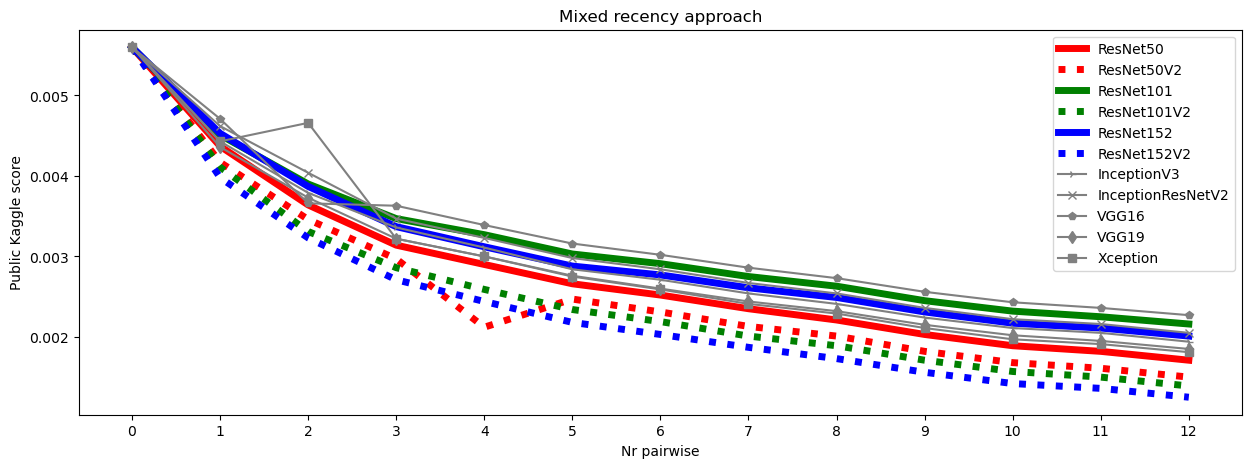

In [35]:
plot_focus_resnet(frame=mixed_frame_not_extended, x_label='Nr pairwise', title='Mixed recency approach')

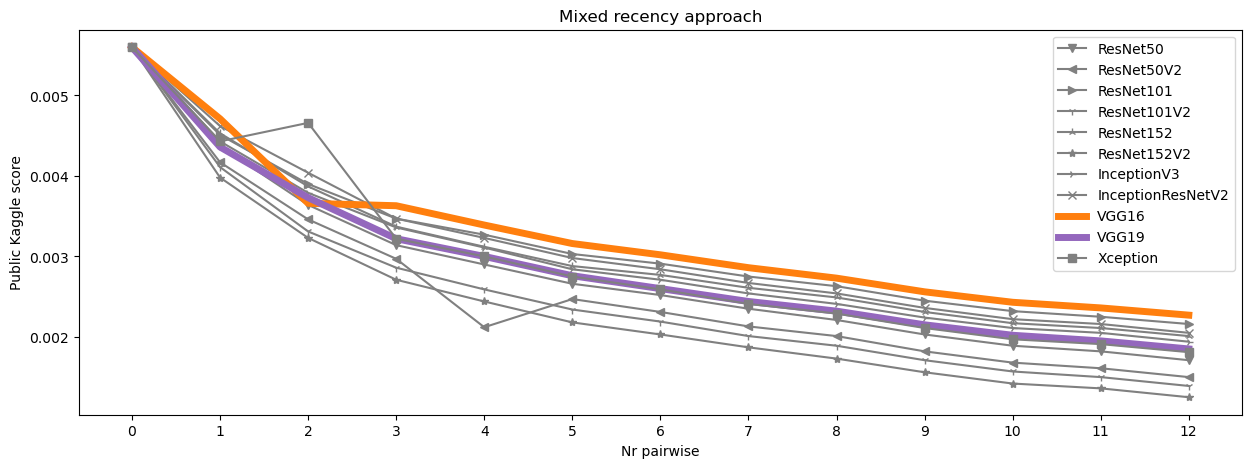

In [36]:
plot_focus_vgg(frame=mixed_frame_not_extended, x_label='Nr pairwise', title='Mixed recency approach')

### Plot extended
Create again two plots: one that focusses on the ResNetxxx vs ResNetxxxV2 and another one that focusses on VGG16 and VGG19.

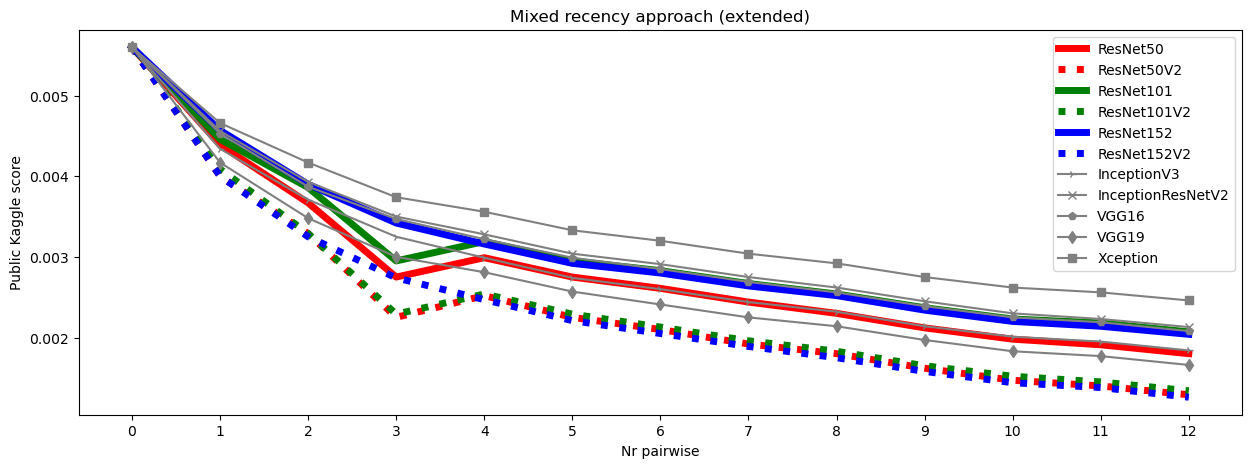

In [39]:
plot_focus_resnet(frame=mixed_frame_extended, x_label='Nr pairwise', title='Mixed recency approach (extended)')

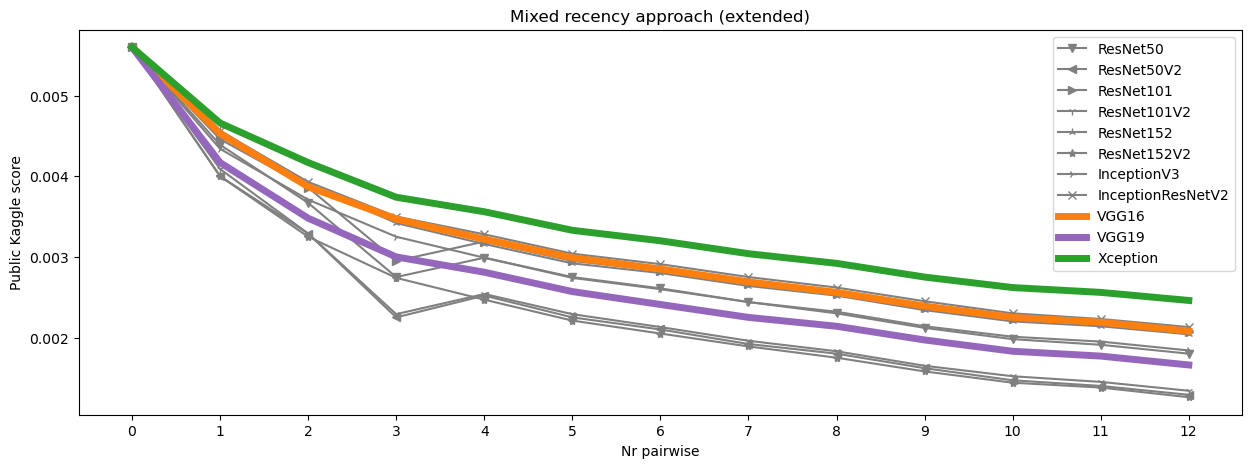

In [40]:
plot_focus_vgg(frame=mixed_frame_extended, x_label='Nr pairwise', title='Mixed recency approach (extended)', color_xception=True)